In [1]:
!pip install wandb  --quiet  

You should consider upgrading via the '/home/juan/dev/Foot-segmentation-CRFFg/.env/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import wandb 
import os 
import pandas as pd
import json
from glob import glob 
import matplotlib.pyplot as plt
import numpy as np 


model2name = {'u_b':'U-Net',
              'u_b_s':'U-Net S-M1',
              'u_r_s':'U-Net CRFFg S-M3',
              'r_b':'ResUNet',
              'f_b':'FCN',
              'u_r_s_m1':'U-Net CRFFg S-M1',
              'u_b_s_m3':'U-Net S-M3',
              'f_r_s_m1': 'FCN CRFFg S-M1',
              'r_r_s_m1':'ResUNet CRFFg S-M1',
              'r_r_s':'ResUNet CRFFg S-M3',
              'r_b_s':'ResUNet S-M1',
              'f_r_s': 'FCN CRFFg S-M3',
              'f_b_s': 'FCN S-M1',
              'r_b_s_m3': 'ResUNet S-M3', 
              'f_b_s_m3': 'FCN S-M3',
           }


In [3]:
def get_metrics(run):
    index = ':v0'
    for i in run.logged_artifacts():
        if 'Metric_per_sample' in i.name and index in i.name:
            dir_json = os.path.join(i.download(),'Metric_per_sample.table.json')
            with open(dir_json) as file:
                json_dict = json.load(file)

            df = pd.DataFrame(json_dict["data"], columns=json_dict["columns"])
            if run.config['model'] in model2name:
                df['model'] = model2name[run.config['model']]
                if len(df['label'].unique()) == 1:
                    df['label'] = 'Feet'
                return df

def get_dfs(runs):
    df = [get_metrics(run) for run in runs]
    df = pd.concat(df,ignore_index=True)
    df.rename(columns={'DiceCoefficientMetric':'Dice'},inplace=True)
    df['Dice'] = -df['Dice']
    return df 


In [6]:
WANDB_PROJECT = 'thesis_experiments'
api = wandb.Api()
runs = api.runs(WANDB_PROJECT)

def load_runs(dataset):
    if dataset=='infrared_thermal_feet':
        return [run for run in runs if  run.state=='finished' and run.config['dataset'] == 'infrared_thermal_feet' and run.sweep.id == '6l60ok26' and  run.config['model'] != 'u_r_b']
        
    if dataset=='infrared_thermal_feet_nodataaug':
        return [run for run in runs if  run.state=='finished' and run.config['dataset'] == 'infrared_thermal_feet_nodataaug' and run.sweep.id == 'hg11kida' and  run.config['model'] != 'u_r_b']


In [ ]:
import re
import matplotlib
import seaborn as sns
from matplotlib.gridspec import GridSpec
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

font = {
        'size'   : 10}
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
matplotlib.rcParams.update(params)

matplotlib.rc('font', **font)
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":18,"axes.labelsize":18})  


import seaborn as sns 
import seaborn as sns
sns.set_theme()


import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import cm

from matplotlib.ticker import FormatStrFormatter


markers=["o", "P", "X","d","p"]

models_markers = {'FCN':markers[0],
                  'FCN CRFFg Skips-M1':markers[1],
                  'FCN CRFFg Skips-M3':markers[2],
                  'FCN Skips-M1':markers[3],
                  'FCN Skips-M3':markers[4],
                  'ResUNet':markers[0],
                  'ResUNet CRFFg Skips-M1':markers[1],
                  'ResUNet CRFFg Skips-M3':markers[2],
                  'ResUNet Skips-M1':markers[3],
                  'ResUNet Skips-M3':markers[4],
                  'U-Net':markers[0],
                  'U-Net CRFFg Skips-M1':markers[1],
                  'U-Net CRFFg Skips-M3':markers[2],
                  'U-Net Skips-M1':markers[3],
                  'U-Net Skips-M3':markers[4]
                  }


models_pallete_high_brightness = np.concatenate([   
                                    cm.get_cmap('Blues', 128)(np.ones((5,))*0.7),#(np.linspace(0.3, 0.9, 5)),
                                    cm.get_cmap('Reds', 128)(np.ones((5,))*0.7),#(np.linspace(0.3, 0.9, 5)),
                                    cm.get_cmap('Greens', 128)(np.ones((5,))*0.7)#(np.linspace(0.3, 0.9, 5)),
                                ])

models_pallete_low_brightness = np.concatenate([
                                    cm.get_cmap('Blues', 128)(np.ones((5,))*0.4),#(np.linspace(0.3, 0.9, 5)),
                                    cm.get_cmap('Reds', 128)(np.ones((5,))*0.4),#(np.linspace(0.3, 0.9, 5)),
                                    cm.get_cmap('Greens', 128)(np.ones((5,))*0.4)#(np.linspace(0.3, 0.9, 5)),
                                ])


def order_models(x):

    ints = re.findall(r'\d+', x)
    if len(ints):
        return int(ints[0])

    else:
        return 0 

<ipython-input-112-f2a370a27478>:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm.get_cmap('Blues', 128)(np.ones((5,))*0.7),#(np.linspace(0.3, 0.9, 5)),
<ipython-input-112-f2a370a27478>:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm.get_cmap('Reds', 128)(np.ones((5,))*0.7),#(np.linspace(0.3, 0.9, 5)),
<ipython-input-112-f2a370a27478>:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm.get_cmap('Greens', 128)(np.ones((5,))*0.7)#(np.linspace(0.3, 0.9, 5)),
<ipython-in

In [ ]:
def plot_bar(dfs, metrics):
    if type(dfs)!= list:
        dfs = [dfs]
        

    dfs = [df.copy() for df in dfs]
    
    fig, axs = plt.subplots(2,2, figsize=(10,10), sharex=True, sharey=True)
    axs = axs.ravel()
    for i,metric in enumerate(metrics):
        for j,df in enumerate(dfs): 
            
            models_pallete = models_pallete_high_brightness if j==0 else  models_pallete_low_brightness

            print(len(df))
            df.sort_values(by='model',inplace = True)
            sns.barplot(data=df, y='model', x=metric, ax=axs[i],
                        #hue='dataset',
                           # order = sorted(df['model']),
                         palette=models_pallete, 
                        #s=100,
                        #    style="model",
                        # markers=models_markers,
                        # legend=True if j==0 else False
                        )
            
            axs[i].tick_params(axis='x', labelrotation=90)
            if j==0:
                continue
            axs[i].xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
            #axs[i].set_ylim([0.84,0.97])
            axs[i].set_xlim([0.6,1])
            
        for ax in axs[1::]:
            try:
                ax.legend_.remove()
            except:
                pass
        # sns.move_legend(axs[0],
        #     loc="lower center",
        #     #bbox_to_anchor=bbox_to_anchor,
        #     bbox_to_anchor=(1.1, 1.05),
        #     ncol=3,
        #     title=None,
        #     frameon=False,
        #     markerscale=1.2
        # )

        
        plt.subplots_adjust(
                        wspace=0.1,
                        hspace=0.1)
        

    plt.savefig(f'results.pdf',bbox_inches='tight', pad_inches=0)
    plt.show()

In [ ]:
df1 = get_dfs(load_runs('infrared_thermal_feet_nodataaug'))
df2 = get_dfs(load_runs('infrared_thermal_feet'))

375
375
375
375
375
375
375
375


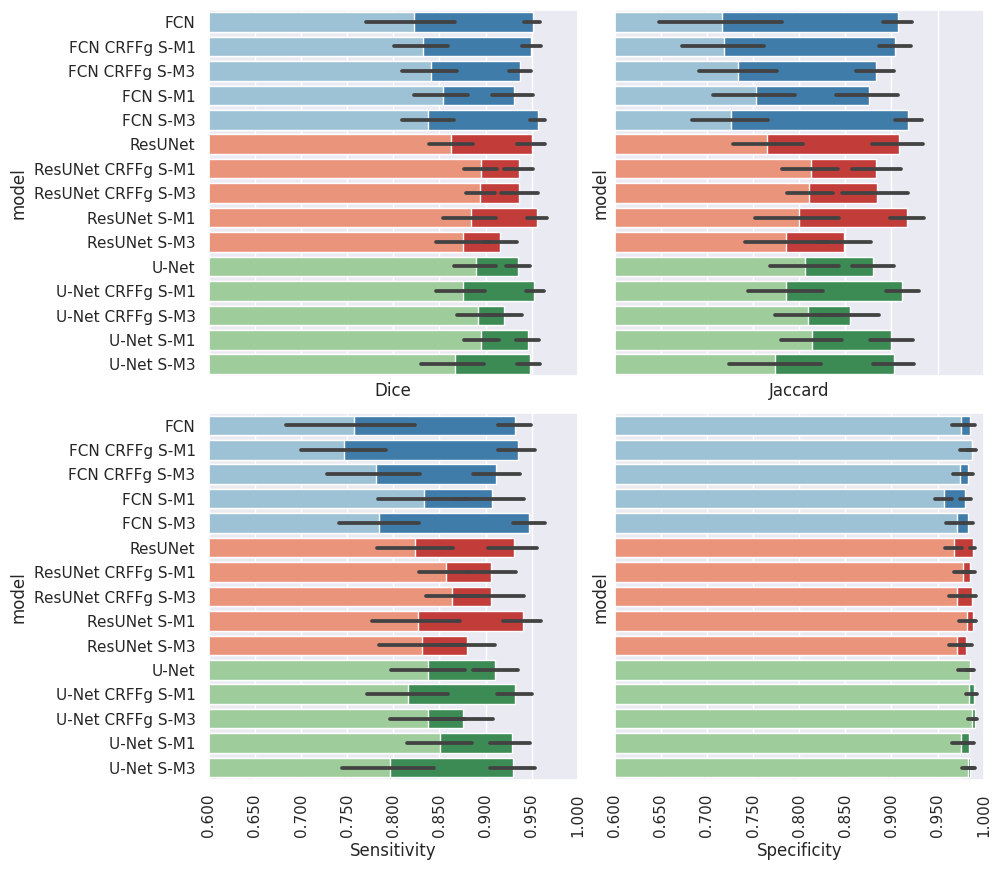

In [ ]:
plot_bar([df2,df1], ['Dice','Jaccard','Sensitivity','Specificity']) 

In [11]:
import matplotlib as mpl


def calcualte_diif_matrix(df):
    re = []
    models = df['model'].unique()
    print(models)
    for model in df['model'].unique():
        df_curr = df[df['model']==model]
        array_model = np.array(df_curr[['Jaccard','Sensitivity','Dice']]) #'Specificity'
        array_models = np.array(df[['Jaccard','Sensitivity','Dice']])
        rest = array_models - array_model
        #rest = rest/array_model
        re.append(rest.T)
    re =  np.array(re)
    #re = re/np.max(abs(re))
    return re 

wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
/tmp/ipykernel_18352/2290637230.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df1.groupby(by='model').mean().reset_index()
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files do

['FCN' 'FCN CRFFg S-M1' 'FCN CRFFg S-M3' 'FCN S-M1' 'FCN S-M3' 'ResUNet'
 'ResUNet CRFFg S-M1' 'ResUNet CRFFg S-M3' 'ResUNet S-M1' 'ResUNet S-M3'
 'U-Net' 'U-Net CRFFg S-M1' 'U-Net CRFFg S-M3' 'U-Net S-M1' 'U-Net S-M3'
 'FCN Aug' 'FCN CRFFg S-M1 Aug' 'FCN CRFFg S-M3 Aug' 'FCN S-M1 Aug'
 'FCN S-M3 Aug' 'ResUNet Aug' 'ResUNet CRFFg S-M1 Aug'
 'ResUNet CRFFg S-M3 Aug' 'ResUNet S-M1 Aug' 'ResUNet S-M3 Aug'
 'U-Net Aug' 'U-Net CRFFg S-M1 Aug' 'U-Net CRFFg S-M3 Aug'
 'U-Net S-M1 Aug' 'U-Net S-M3 Aug']


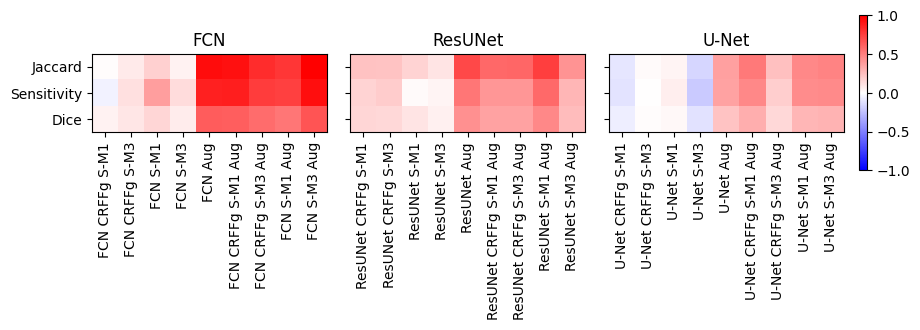

In [12]:
df1 = get_dfs(load_runs('infrared_thermal_feet_nodataaug'))
df1 = df1.groupby(by='model').mean().reset_index()
df2 = get_dfs(load_runs('infrared_thermal_feet'))
df2 = df2.groupby(by='model').mean().reset_index()


df2['model']  = df2['model'].map(lambda x: x+' Aug')
df = pd.concat([df1,df2])


re = calcualte_diif_matrix(df)


max_ = -1000
min_ = 10000
for j in range(0,15,5):
    re_curr1 = re[j,:,j+1:j+5]
    re_curr2 = re[j,:,j+15: j+15+5]
    re_curr = np.c_[re_curr1,re_curr2]
    max_ = np.max([max_, np.max(re_curr)])
    min_ = np.min([min_, np.min(re_curr)])

max_ = np.max([max_, abs(min_)])



fig, axes = plt.subplots(1,3, sharey=True,figsize=(10,10))

for ax, j,arch in zip(axes,range(0,15,5),['FCN','ResUNet','U-Net']):
    re_curr1 = re[j,:,j+1:j+5]
    re_curr2 = re[j,:,j+15: j+15+5]
    re_curr = np.c_[re_curr1,re_curr2]
    labels = [*df['model'].unique()[j+1:j+5],*df['model'].unique()[j +15: j+15+5]]
    im = ax.imshow(re_curr/max_,cmap='bwr',vmin=-1, vmax=1)
    ax.set_xticks(np.arange(9), labels,rotation=90)
    ax.set_yticks(np.arange(3),['Jaccard','Sensitivity','Dice'],rotation=0)
    ax.set_title(arch)


plt.subplots_adjust(
                wspace=0.1,
                )
plt.colorbar(im, ax=axes.ravel().tolist(),fraction=0.01, pad=0.02)
plt.savefig(f'baseline_models.pdf',bbox_inches='tight', pad_inches=0)
plt.show()
